# Data Scientist Coding Exercise

The CEO has come to your desk and explained that we want to increase signups from our referral scheme. As part of this effort, we are keen to understand at what point in the member lifecycle members refer other people. 

This exercise contains 2 files:
that contain information on our customers and their referral behaviour:

📑 The Customer Info CSV contains information on customers and metadata for each customer. It is a representative sample of the whole customer database

📑 The Referral Info CSV is a log of sign-ups we have received from the referral channel

❓ Use this information to answer the questions below:
1. When do members refer?

2. Does the channel members are acquired from significantly impact how they refer? 

3. We can send an email to members to invite them to refer their friends. We can choose when, and to whom, we send the emails. How would you suggest we proceed?

In [1]:
# Import necessary tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# Import customer info file
customer = pd.read_csv("./data/180601_Customer_Info.csv")
customer.head()

,customer_id,sign_up_date,sign_up_channel
0,2543,2021-04-26,Price Comparison Website
1,2181,2021-07-24,Referral
2,2399,2020-10-11,Bulb Website
3,674,2021-04-04,Referral
4,2332,2021-09-05,Price Comparison Website


In [3]:
# Import customer info file
referral = pd.read_csv("./data/180601_Referrals_Info.csv")
referral.head()

,referral_date,referrer_customer_id,sign_up_customer_id
0,2021-07-18,795,1771
1,2021-04-12,577,1510
2,2021-07-07,868,1858
3,2021-10-25,801,1778
4,2021-08-15,690,1637


In [4]:
# Show information about files
print("------------------ Customer file ------------------")
print(customer.info())

print("------------------ Referral file ------------------")
print(referral.info())

------------------ Customer file ------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      1699 non-null   int64 
 1   sign_up_date     1699 non-null   object
 2   sign_up_channel  1699 non-null   object
dtypes: int64(1), object(2)
memory usage: 39.9+ KB
None
------------------ Referral file ------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   referral_date         1000 non-null   object
 1   referrer_customer_id  1000 non-null   int64 
 2   sign_up_customer_id   1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB
None


✅ There are no missing values in the files.

In [5]:
#Drop duplicates of files
customer.drop_duplicates()
print(f" Customer file's shape after dropping duplicates {customer.shape}")
referral.drop_duplicates()
print(f" Referral file's shape after dropping duplicates {referral.shape}")

 Customer file's shape after dropping duplicates (1699, 3)
 Referral file's shape after dropping duplicates (1000, 3)


✅ No duplicates were found on the files

In [6]:
#Combining data frames
combined = pd.merge(customer, referral, left_on='customer_id', right_on='referrer_customer_id')
combined

,customer_id,sign_up_date,sign_up_channel,referral_date,referrer_customer_id,sign_up_customer_id
0,674,2021-04-04,Referral,2021-04-04,674,1618
1,468,2021-06-10,Referral,2021-07-18,468,1382
2,837,2021-07-09,Referral,2021-07-18,837,1823
3,253,2021-01-10,Bulb Website,2021-06-19,253,1141
4,219,2021-04-04,Bulb Website,2021-09-15,219,1106
...,...,...,...,...,...,...
827,332,2021-07-18,Referral,2021-07-22,332,1396
828,332,2021-07-18,Referral,2021-12-06,332,1225
829,704,2021-01-29,Referral,2021-02-01,704,1654
830,820,2021-07-17,Referral,2021-09-05,820,1802


In [7]:
# Converting dates into datetimes
combined["referral_date"] = pd.to_datetime(combined["referral_date"])
combined["sign_up_date"] = pd.to_datetime(combined["sign_up_date"])
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 832 entries, 0 to 831
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customer_id           832 non-null    int64         
 1   sign_up_date          832 non-null    datetime64[ns]
 2   sign_up_channel       832 non-null    object        
 3   referral_date         832 non-null    datetime64[ns]
 4   referrer_customer_id  832 non-null    int64         
 5   sign_up_customer_id   832 non-null    int64         
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 45.5+ KB


## When do members refer?

In [8]:
#calculates how many weeks takes for a customer to refer
combined['Referal_time(Days)'] = ((combined.referral_date - combined.sign_up_date)/np.timedelta64(1, 'D'))
combined['Referal_time(Days)'] = combined['Referal_time(Days)'].astype(int)
combined

,customer_id,sign_up_date,sign_up_channel,referral_date,referrer_customer_id,sign_up_customer_id,Referal_time(Days)
0,674,2021-04-04,Referral,2021-04-04,674,1618,0
1,468,2021-06-10,Referral,2021-07-18,468,1382,38
2,837,2021-07-09,Referral,2021-07-18,837,1823,9
3,253,2021-01-10,Bulb Website,2021-06-19,253,1141,160
4,219,2021-04-04,Bulb Website,2021-09-15,219,1106,164
...,...,...,...,...,...,...,...
827,332,2021-07-18,Referral,2021-07-22,332,1396,4
828,332,2021-07-18,Referral,2021-12-06,332,1225,141
829,704,2021-01-29,Referral,2021-02-01,704,1654,3
830,820,2021-07-17,Referral,2021-09-05,820,1802,50


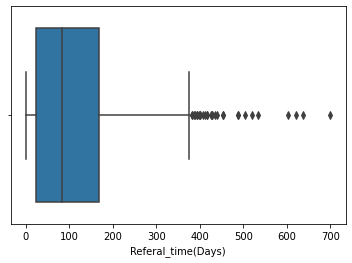

In [9]:
sns.boxplot(data=combined, x="Referal_time(Days)");

In [10]:
print(f"In average, a customer takes {combined['Referal_time(Days)'].median()} days to refer a person.")
print(f"But it can take as much as {round(combined['Referal_time(Days)'].max()/30)} months.")

In average, a customer takes 83.5 days to refer a person.
But it can take as much as 23 months.


## Does the channel members are acquired from significantly impact how they refer?

In [11]:
#How many different channels are on how customers are acquired from:
combined["sign_up_channel"].nunique()

3

In [12]:
# show numbers of how customer were acquired according to channels:
ref_count = combined.sign_up_channel.str.contains(r'Referral').sum()
company_count = combined.sign_up_channel.str.contains(r'Bulb Website').sum()
other_website_count = combined.sign_up_channel.str.contains(r'Price Comparison').sum()

combined["sign_up_channel"].value_counts()

Referral                    449
Bulb Website                195
Price Comparison Website    188
Name: sign_up_channel, dtype: int64

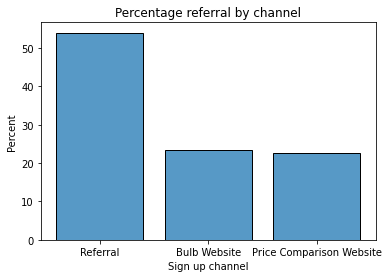

In [13]:
referral_graph = sns.histplot(x = combined['sign_up_channel'],
                  stat = 'percent', shrink = 0.8)

# add label to the axis and label to the plot
referral_graph.set(xlabel ="Sign up channel", title ='Percentage referral by channel');

In [14]:
ref_perc = round((combined.sign_up_channel.str.contains(r'Referral').sum())/combined["sign_up_channel"].size * 100)
company_perc = round((combined.sign_up_channel.str.contains(r'Bulb Website').sum())/combined["sign_up_channel"].size * 100)
other_website_perc = round((combined.sign_up_channel.str.contains(r'Price Comparison').sum())/combined["sign_up_channel"].size * 100)

In [21]:
count = ref_count #number of referral 
nobs = combined.sign_up_channel.size
value = 0.5 # This is the value of the null hypothesis. 
 
stat, pval = proportions_ztest(count, nobs, value, alternative='two-sided')
 
p_value =round(pval,3)

In [19]:
print(f"There is a {ref_perc}% probablitlity that a person who signed by referral to become a refereer, with a p value of {p_value}.")
print(f"These percentages are as lower as {company_perc}% and {other_website_perc}% if the person firstly signed up via the company's \nwebsite or price comparison websites.")

There is a 54% probablitlity that a person who signed by referral to become a refereer, with a p value of 0.022.
These percentages are as lower as 23% and 23% if the person firstly signed up via the company's 
website or price comparison websites.


## Model for who and when to send an invitation e-mail

Customers who signed through referrals from previous customers should receive an email around 3 months after they first signed, asking to refer a new customer.